In [80]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import scipy
from scipy.sparse import load_npz

In [81]:
X_train = load_npz('../vectors/tfidf_lemma/X_train_tfidf.npz')
y_train = np.load('../vectors/tfidf_lemma/y_train.npy')

X_test = load_npz('../vectors/tfidf_lemma/X_test_tfidf.npz')
y_test = np.load('../vectors/tfidf_lemma/y_test.npy')

In [82]:
X_train = scipy.sparse.csr_matrix.toarray(X_train)
X_test = scipy.sparse.csr_matrix.toarray(X_test)

In [83]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [107]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes no exemplo

In [108]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
model.fit(X_train, y_train_onehot, epochs=10, batch_size=256, validation_split=0.2, verbose=2)

Epoch 1/10
21/21 - 1s - loss: 0.0223 - accuracy: 0.9990 - val_loss: 2.5237 - val_accuracy: 0.4680 - 581ms/epoch - 28ms/step
Epoch 2/10
21/21 - 0s - loss: 0.0192 - accuracy: 0.9992 - val_loss: 2.5867 - val_accuracy: 0.4665 - 229ms/epoch - 11ms/step
Epoch 3/10
21/21 - 0s - loss: 0.0166 - accuracy: 0.9992 - val_loss: 2.6302 - val_accuracy: 0.4665 - 248ms/epoch - 12ms/step
Epoch 4/10
21/21 - 0s - loss: 0.0147 - accuracy: 0.9992 - val_loss: 2.6790 - val_accuracy: 0.4672 - 199ms/epoch - 9ms/step
Epoch 5/10
21/21 - 0s - loss: 0.0130 - accuracy: 0.9994 - val_loss: 2.7237 - val_accuracy: 0.4695 - 198ms/epoch - 9ms/step
Epoch 6/10
21/21 - 0s - loss: 0.0118 - accuracy: 0.9994 - val_loss: 2.7693 - val_accuracy: 0.4672 - 207ms/epoch - 10ms/step
Epoch 7/10
21/21 - 0s - loss: 0.0105 - accuracy: 0.9994 - val_loss: 2.8139 - val_accuracy: 0.4695 - 216ms/epoch - 10ms/step
Epoch 8/10
21/21 - 0s - loss: 0.0095 - accuracy: 0.9996 - val_loss: 2.8544 - val_accuracy: 0.4688 - 251ms/epoch - 12ms/step
Epoch 9/10

In [113]:
accuracy = model.evaluate(X_test, y_test_onehot)[1]
print(f'Acurácia do Modelo MLP: {accuracy}')

52/52 [==============================] - 0s 1ms/step - loss: 3.0402 - accuracy: 0.4494
Acurácia do Modelo MLP: 0.4493902325630188


52/52 [==============================] - 0s 1ms/step


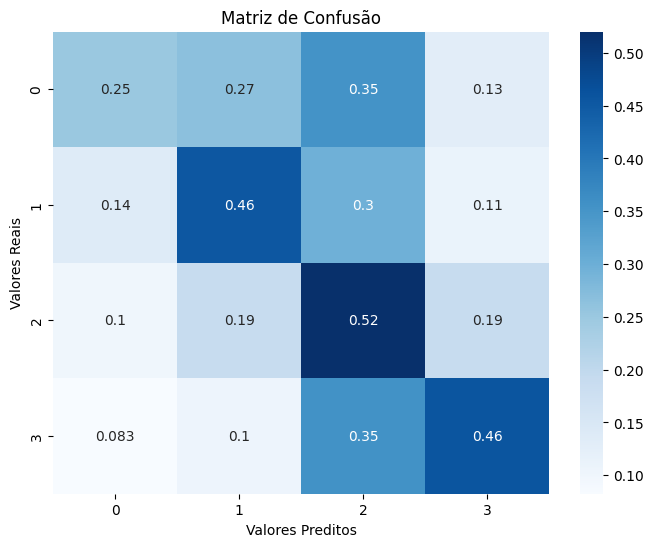

In [114]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

labels = ['0','1','2','3']

label_encoder = LabelEncoder()

y_pred_onehot = model.predict(X_test)

label_encoder.fit(labels)

y_pred = label_encoder.inverse_transform(y_pred_onehot.argmax(axis=1))

# Obter as verdadeiras classes no conjunto de teste
y_test_decoded = label_encoder.inverse_transform(y_test)

cm1 = confusion_matrix(y_test_decoded, y_pred)

cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()